# WELCOME TO THE NOTEBOOK
------------------------------
## Task 1

### Importing the modules

In [1]:
import numpy as np 
import pandas as pd 
import plotly.graph_objects as go
import plotly.express as px
import plotly
import re
print('modules are imported')

modules are imported


### let's load the fifa 2020 dataset

In [2]:
df_20 = pd.read_csv('players_20.csv')

let's check the dataset

In [6]:
df_20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


checking how many rows and columns we have

In [7]:
df_20.shape

(18278, 104)

let's check the columns

In [20]:
df_20['player_positions']

0        RW, CF, ST
1            ST, LW
2           LW, CAM
3                GK
4            LW, CF
            ...    
18273            CB
18274            CB
18275            CM
18276            CM
18277            CM
Name: player_positions, Length: 18278, dtype: object

## Task 2:
### Data Preprocessin
Dropping some useless columns

In [12]:
useless_columns = ['dob','sofifa_id', 'player_url', 'long_name', 'body_type', 'real_face', 'loaned_from', 'nation_position', 'nation_jersey_number']

Let's check the dataframe again

In [14]:
df_20.drop(useless_columns, axis=1)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,Xiao Mingjie,22,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,Zhang Wei,19,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,Wang Haijian,18,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


### Calculating BMI 
let's calculate body max index of each Player 

In [15]:
df_20['BMI'] = df_20['weight_kg'] / (df_20['height_cm']/100)**2

In [16]:
df_20['BMI']

0        24.913495
1        23.735308
2        22.204082
3        24.615211
4        24.163265
           ...    
18273    22.835010
18274    21.066743
18275    21.678807
18276    21.621622
18277    23.547881
Name: BMI, Length: 18278, dtype: float64

### Player's Position 
Convert the categorical values in Player's Position column in integer values.

In [21]:
new_player_positions = df_20['player_positions'].str.get_dummies(sep = ', ').add_prefix('Position_')

let's convert the column to integeral columns

In [22]:
new_player_positions.head()

,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LB,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


concatinating new_player_position dataframe to our dataframe

In [23]:
df_20= pd.concat([df_20, new_player_positions], axis=1)

let's check the dataset again

In [24]:
df_20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,Position_GK,Position_LB,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,0,0,0,0,0,0,0,1,0,1
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,0,0,0,1,0,0,0,0,0,1
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,0,0,0,1,0,0,0,0,0,0
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,1,0,0,0,0,0,0,0,0,0
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,0,0,0,1,0,0,0,0,0,0


let's drop the original player_positions columns

In [28]:
df_20 = df_20.drop('player_positions', axis =1)

let's check the dataset again

In [29]:
df_20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,Position_GK,Position_LB,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,0,0,0,0,0,0,0,1,0,1
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,0,0,0,1,0,0,0,0,0,1
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,0,0,0,1,0,0,0,0,0,0
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,1,0,0,0,0,0,0,0,0,0
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,0,0,0,1,0,0,0,0,0,0


## Task 3:
### Position Columns ratings
Clean, Process and Assign the new attributes to columns listed below.

In [32]:
columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb']

let's check what we have in these columns

let's omit the '+' sign

In [33]:
for col in columns:
    df_20[col] = df_20[col].str.split('+', n=1, expand=True)[0]

df_20.columns
    

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'Position_GK', 'Position_LB', 'Position_LM', 'Position_LW',
       'Position_LWB', 'Position_RB', 'Position_RM', 'Position_RW',
       'Position_RWB', 'Position_ST'],
      dtype='object', length=119)

Let's Replace NaN values with 0 

In [34]:
df_20[columns] =  df_20[columns].fillna(0)

Let's convert the columns to int 

In [35]:
df_20[columns] = df_20[columns].astype(int)

Checking the dataframe again

In [36]:
df_20[columns].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,...,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,...,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,...,66,61,61,61,66,61,46,46,46,61
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,83,83,83,89,88,88,88,89,89,89,...,66,63,63,63,66,61,49,49,49,61


### Filling Missing Values
Let's fill <b>"dribbling", "defending", "physic", "passing", "shooting" and "pace" </b> missing values of these columns by median


In [39]:
columns = ["dribbling", "defending", "physic", "passing", "shooting", "pace"]

At first let's check how many NaN values are there in these columuns

In [40]:
df_20[columns].isnull().sum()

dribbling    2036
defending    2036
physic       2036
passing      2036
shooting     2036
pace         2036
dtype: int64

now lets fill the NaN values with the median of the respective column

In [41]:
for col in columns:
    df_20[col] = df_20[col].fillna(df_20[col].median())

let's fill all NaN values in the dataframe with 0

In [42]:
df_20.fillna(0)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,Position_GK,Position_LB,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,0,0,0,0,0,0,0,1,0,1
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,0,0,0,1,0,0,0,0,0,1
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,0,0,0,1,0,0,0,0,0,0
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,1,0,0,0,0,0,0,0,0,0
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,0,0,0,0,0,0,0,0,0,0
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,0,0,0,0,0,0,0,0,0,0
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,0,0,0,0,0,0,0,0,0,0
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,0,0,0,0,0,0,0,0,0,0


let's count the NaN values again 

In [59]:
l = list(df_20.columns)
l

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_

## Task 4:
## Exploratory Data Analysis

#### 1- Scatter Plot (colored by Age) year 2020 - Overall Rating vs Value in Euros 

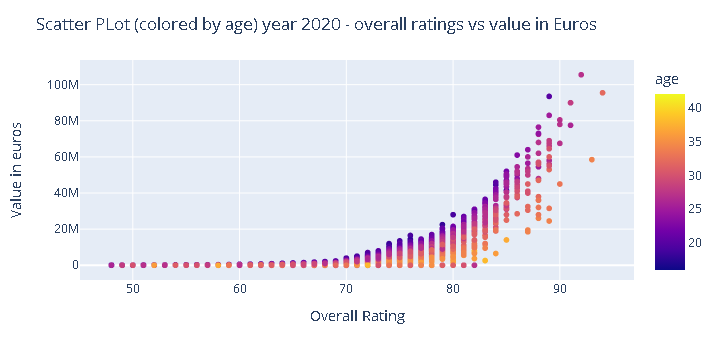

In [63]:
fig = px.scatter(df_20, x=df_20['overall'], y=df_20['value_eur'], color=df_20['age']
                 )


fig.update_layout(title='Scatter PLot (colored by age) year 2020 - overall ratings vs value in Euros',
                  xaxis_title = 'Overall Rating',
                  yaxis_title = 'Value in euros')
fig.show()
    

#### 2- Pie chart proportion of right-foot players vs left-foot players

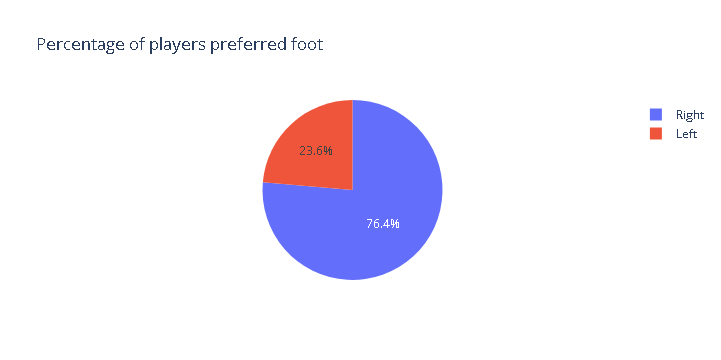

In [65]:
fig = px.pie(df_20, names = 'preferred_foot', title = 'Percentage of players preferred foot')

fig.show()


#### 4- Scatterpolar plot to compare a player's growth over time
let's load the other datasets players from 2016 to 2019

In [68]:
df_16 = pd.read_csv("players_16.csv")
df_17 = pd.read_csv("players_17.csv")
df_18 = pd.read_csv("players_18.csv")
df_19 = pd.read_csv("players_19.csv")

player attributes column names

In [69]:
attributes = ['Pace','Shooting','Passing','Dribbling','Defending','Physic','Overall'] 

Creating a method to compare a Players growth over Time

In [108]:
def playergrowth(name):

    data20 = df_20[df_20.short_name.str.startswith(name)]
    data19 = df_19[df_19.short_name.str.startswith(name)]
    data18 = df_18[df_18.short_name.str.startswith(name)]
    data17 = df_17[df_17.short_name.str.startswith(name)]
    data16 = df_16[df_16.short_name.str.startswith(name)]

    trace0 = go.Scatterpolar(r=[data20['pace'].values[0], data20['shooting'].values[0],data20['dribbling'].values[0]
                             ,data20['defending'].values[0],data20['physic'].values[0],data20['overall'].values[0]],
                          theta = attributes,
                          fill = 'toself',
                          name = '2020')
    
    trace1 = go.Scatterpolar(r=[data19['pace'].values[0], data19['shooting'].values[0],data19['dribbling'].values[0]
                             ,data19['defending'].values[0],data19['physic'].values[0],data19['overall'].values[0]],
                          theta = attributes,
                          fill = 'toself',
                          name = '2019')
    
    trace2 = go.Scatterpolar(r=[data18['pace'].values[0], data18['shooting'].values[0],data18['dribbling'].values[0]
                             ,data18['defending'].values[0],data18['physic'].values[0],data18['overall'].values[0]],
                          theta = attributes,
                          fill = 'toself',
                          name = '2018')

    trace3 = go.Scatterpolar(r=[data17['pace'].values[0], data17['shooting'].values[0],data17['dribbling'].values[0]
                             ,data17['defending'].values[0],data17['physic'].values[0],data17['overall'].values[0]],
                          theta = attributes,
                          fill = 'toself',
                          name = '2017')

    trace4 = go.Scatterpolar(r=[data16['pace'].values[0], data16['shooting'].values[0],data16['dribbling'].values[0]
                             ,data16['defending'].values[0],data16['physic'].values[0],data16['overall'].values[0]],
                          theta = attributes,
                          fill = 'toself',
                          name = '2016')
    
    data = [trace0, trace1, trace2, trace3, trace4]
    layout = go.Layout(height= 700, width=700,
        polar = dict(
            radialaxis = dict(
                visible = True,
                range = [0,100])
           
        )
        ,
        showlegend = True,
        title = 'Stats related to {} from 2016 to 2020' . format(name)
    )

    fig = go.Figure(data = data, layout = layout)
    fig.show()

    
        

Let's check the growth of Neymar over time 

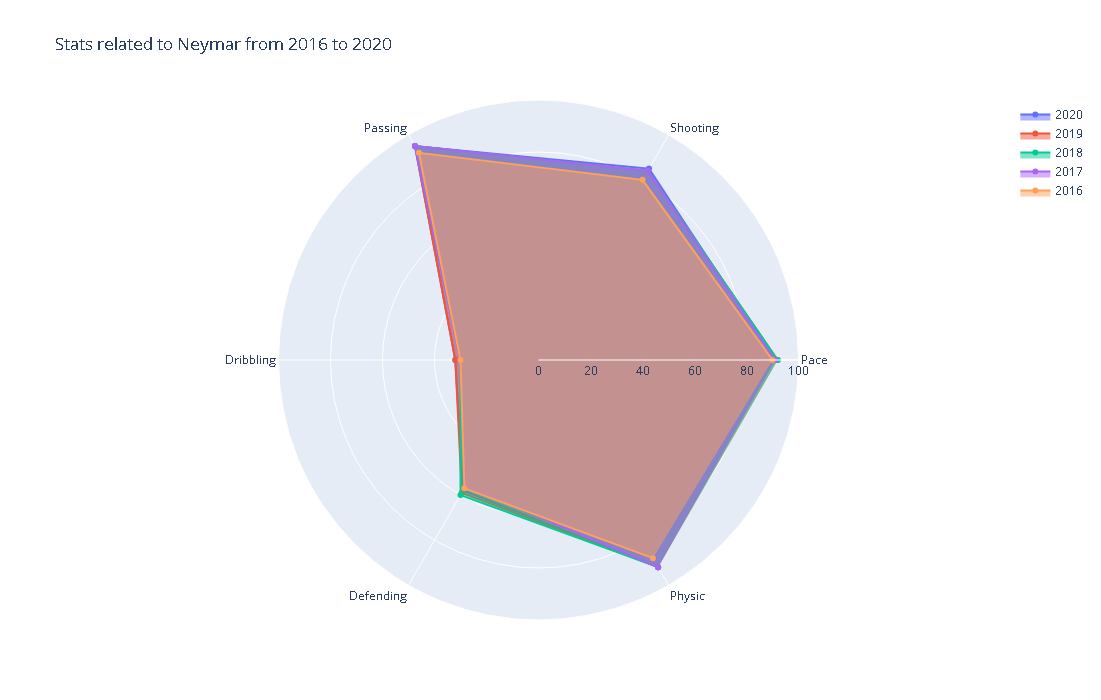

In [109]:
playergrowth('Neymar')

what about cristiano Ronaldo

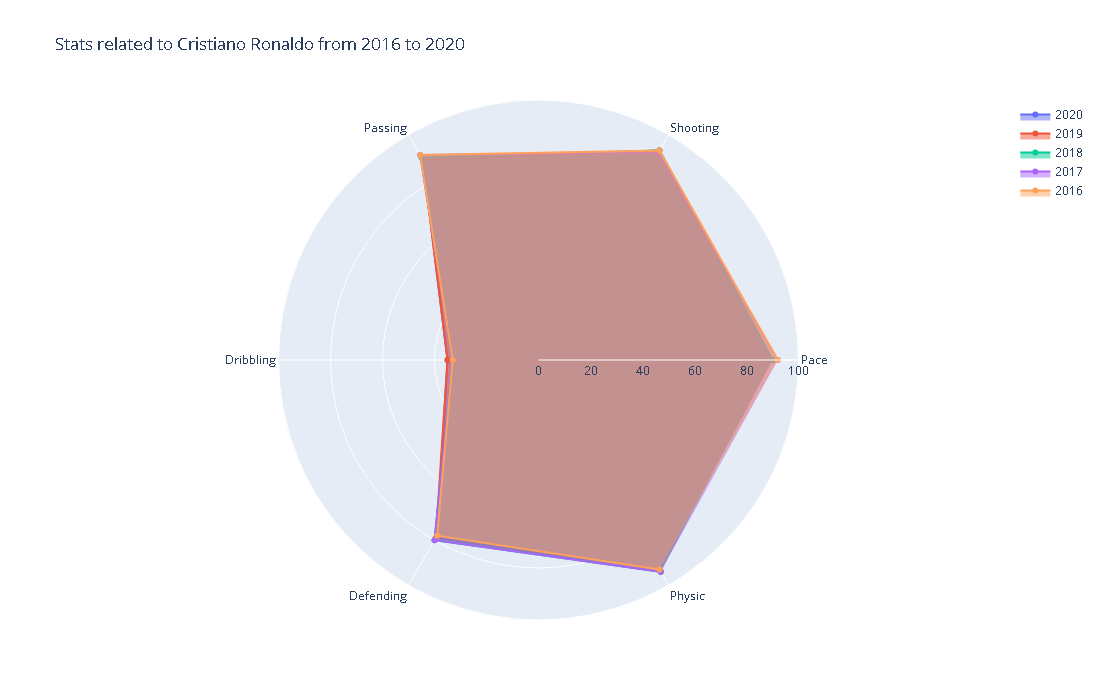

In [110]:
playergrowth('Cristiano Ronaldo')

## Task 5:
#### 6- Pie chart Describing the Percentage of Players in different Attacker positions

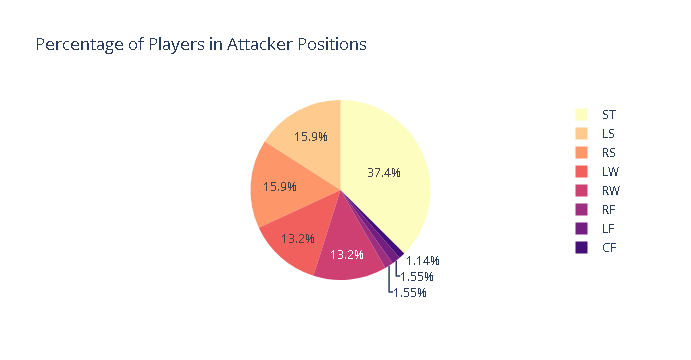

In [111]:
attack = ['RW', 'LW', 'ST', 'CF', 'LS', 'RS', 'RF', 'LF']
sample = df_20.query('team_position in @attack')

fig = px.pie(sample, names= 'team_position', color_discrete_sequence=px.colors.sequential.Magma_r, title ='Percentage of Players in Attacker Positions')
fig.show()

#### 7- Pie chart Describing the Percentage of Players in different Midfielder positions

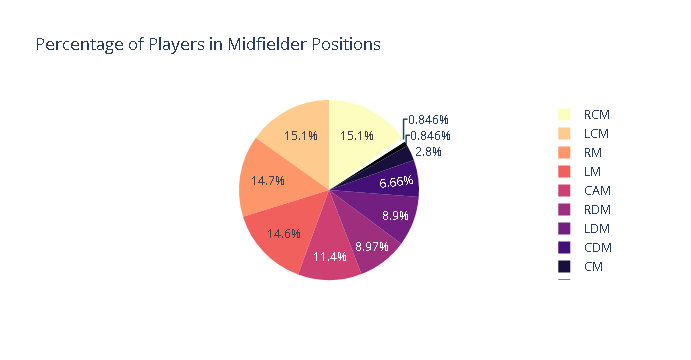

In [112]:
mid = ['CAM', 'RCM', 'CDM', 'LDM', 'RM', 'LCM', 'LM', 'RDM', 'RAM','CM', 'LAM']
sample = df_20.query('team_position in @mid')

fig = px.pie(sample, names= 'team_position', color_discrete_sequence=px.colors.sequential.Magma_r, title ='Percentage of Players in Midfielder Positions')
fig.show()

#### 8- Pie chart Describing the Percentage of Players in different Defender positions

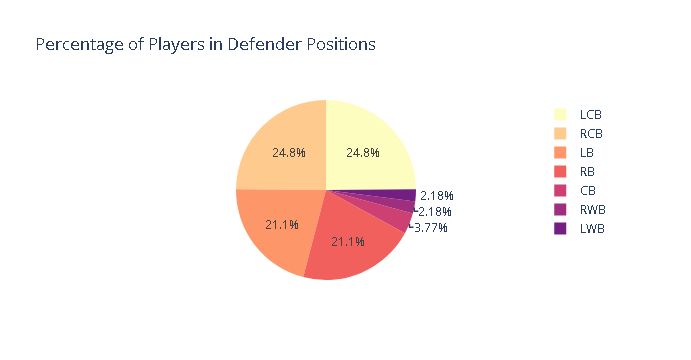

In [113]:
defence = ['LCB', 'RCB', 'LB', 'RB', 'CB', 'RWB', 'LWB']
sample = df_20.query('team_position in @defence')

fig = px.pie(sample, names= 'team_position', color_discrete_sequence=px.colors.sequential.Magma_r, title ='Percentage of Players in Defender Positions')
fig.show()

### Pick Top 5 Players per Position
Creating a method to pick top 5 player based on a the player position and the player value in euro

In [114]:
def pick_top_players(pos,value):
    column = str('Position_')+ str.upper(pos)
    target_players = df_20[(df_20[column] == 1) & (df_20['value_eur'] <= value)][['short_name', 'age', 'overall', 'value_eur']].head(5)
    return target_players

In [115]:
pick_top_players('lb', 34000000)

,short_name,age,overall,value_eur
101,Marcelo,31,85,28000000
103,Alex Sandro,28,85,33000000
124,Alex Telles,26,84,33000000
174,Grimaldo,23,83,29500000
179,L. Digne,25,83,28500000


In [116]:
pick_top_players('st', 55000000)

,short_name,age,overall,value_eur
19,L. Suárez,32,89,53000000
34,E. Cavani,32,88,47000000
46,K. Benzema,31,87,45000000
48,D. Mertens,32,87,40000000
54,L. Insigne,28,87,52000000
